<a href="https://colab.research.google.com/github/Sulbae/Latihan-Membangun-Sistem-Machine-Learning/blob/main/Template_Eksperimen_MSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [47]:
import mlflow
import dagshub
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# **Memuat Preprocessed Data**

## Classifier Data

In [115]:
clf_train = pd.read_csv('../preprocessing/clf_train_preprocessed.csv')
clf_test = pd.read_csv('../preprocessing/clf_test_preprocessed.csv')

In [116]:
clf_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505288,0.371295,0.048040,-0.791809,2.052308,0.925183,0.565242,-0.365393,-0.177457,0
1,-0.709433,0.935084,-1.016080,0.850917,1.617777,-1.501693,-2.169448,-1.581404,-0.486502,1
2,0.929048,0.980710,0.808192,-0.585714,-0.019216,-0.818137,0.085404,-0.351573,0.547202,0
3,-0.227728,0.671248,-0.001853,0.030738,-0.019216,-0.677955,0.774861,0.501623,-0.091554,0
4,-0.390242,0.176673,-0.548156,-0.571875,-0.196177,0.665479,0.686438,-1.263826,-0.544746,0


In [117]:
clf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [118]:
clf_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.030569,-0.238336,-0.325470,-0.676788,-0.019216,-0.492411,0.265884,0.781086,-1.602336,1
1,-0.617506,-0.267650,-1.300395,0.379131,-0.310487,0.484065,2.112074,0.126600,0.200210,0
2,-0.030569,-0.617017,0.469844,0.433350,0.680667,-1.134013,0.053165,1.523568,0.559978,0
3,-0.483725,1.189652,1.435043,1.284983,-1.060448,-0.871123,-1.535066,-0.435916,-2.176229,0
4,-0.639037,0.041532,0.548021,0.294471,-0.125254,1.484732,0.474402,-1.576772,1.776070,0


In [119]:
clf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               656 non-null    float64
 1   Hardness         656 non-null    float64
 2   Solids           656 non-null    float64
 3   Chloramines      656 non-null    float64
 4   Sulfate          656 non-null    float64
 5   Conductivity     656 non-null    float64
 6   Organic_carbon   656 non-null    float64
 7   Trihalomethanes  656 non-null    float64
 8   Turbidity        656 non-null    float64
 9   Potability       656 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 51.4 KB


## Anomali Detection Data

In [148]:
anom_train = pd.read_csv('../preprocessing/anom_train_preprocessed.csv')
anom_test = pd.read_csv('../preprocessing/anom_test_preprocessed.csv')

In [149]:
anom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1598 non-null   float64
 1   Hardness         1598 non-null   float64
 2   Solids           1598 non-null   float64
 3   Chloramines      1598 non-null   float64
 4   Sulfate          1598 non-null   float64
 5   Conductivity     1598 non-null   float64
 6   Organic_carbon   1598 non-null   float64
 7   Trihalomethanes  1598 non-null   float64
 8   Turbidity        1598 non-null   float64
dtypes: float64(9)
memory usage: 112.5 KB


In [150]:
anom_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               400 non-null    float64
 1   Hardness         400 non-null    float64
 2   Solids           400 non-null    float64
 3   Chloramines      400 non-null    float64
 4   Sulfate          400 non-null    float64
 5   Conductivity     400 non-null    float64
 6   Organic_carbon   400 non-null    float64
 7   Trihalomethanes  400 non-null    float64
 8   Turbidity        400 non-null    float64
dtypes: float64(9)
memory usage: 28.3 KB


In [151]:
anom_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,1.483576,2.205752,-0.776626,-1.894531,-0.038065,0.933781,-0.923066,2.077439,0.090741
1,-0.002356,-0.566624,-1.943432,1.081478,3.748773,-0.430776,0.729765,0.627900,0.558040
2,-0.002356,-0.298466,-0.976819,0.135141,-0.034805,0.987922,1.116223,0.825623,1.750919
3,-0.967118,-1.724667,0.042550,1.424687,1.048928,0.120516,-0.837103,-0.888276,0.237414
4,0.330765,-0.273897,1.273388,-0.245990,0.950354,-1.240109,-0.150091,0.449326,-0.599873


In [152]:
anom_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.529554,0.324820,1.104997,-1.723595,0.470505,1.720088,0.469085,0.422871,0.062651
1,0.465456,0.867982,1.795052,-0.299709,-0.034805,-1.029092,0.687522,0.534890,-1.359288
2,1.039000,-1.701033,-2.235356,1.391224,0.415942,1.109335,-0.126252,-1.527083,-2.162057
3,0.169183,-0.470048,-1.872307,-0.233489,1.219027,-0.826896,1.814575,0.452557,-0.701315
4,-0.358681,-0.509947,0.066784,2.239030,-1.944299,-0.939205,-0.711748,0.012214,-0.510351


# Modelling

## Classifier Model

In [22]:
clf_X_train = clf_train.drop('Potability', axis=1)
clf_y_train = clf_train['Potability']

clf_X_test = clf_test.drop('Potability', axis=1)
clf_y_test = clf_test['Potability']

In [56]:
# Model Random Forest Classifier
model_clf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
)

In [57]:
N_ESTIMATORS_RANGE = np.linspace(10, 100, 3, dtype=int)
MAX_DEPTH_RANGE = np.linspace(1, 50, 3, dtype=int)
MIN_SAMPLES_LEAF = np.linspace(1, 10, 3, dtype=int)
MIN_SAMPLES_SPLIT = np.linspace(2, 10, 3, dtype=int)

In [58]:
param_grid = {
    'n_estimators': N_ESTIMATORS_RANGE,   
    'max_depth': MAX_DEPTH_RANGE,
    'min_samples_leaf': MIN_SAMPLES_LEAF,
    'min_samples_split': MIN_SAMPLES_SPLIT
}

In [59]:
grid_search = GridSearchCV(
    estimator=model_clf,
    param_grid=param_grid,
    cv=3,                 
    scoring = {
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    },
    refit = 'precision',
    n_jobs=-1,
    verbose=2
)

In [60]:
grid_search.fit(clf_X_train, clf_y_train)

best_model = grid_search.best_estimator_

grid_search.cv_results_['mean_test_precision']
grid_search.cv_results_['mean_test_recall']
grid_search.cv_results_['mean_test_f1']

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.6296893811562473


In [103]:
y_prob = best_model.predict_proba(clf_X_test)[:,1]
y_pred = (y_prob >= 0.69).astype(int) # Threshold klasifikasi

In [104]:
# Evaluasi model
precision = precision_score(clf_y_test, y_pred)
recall = recall_score(clf_y_test, y_pred)
f1 = f1_score(clf_y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 0.0546875
F1 Score: 0.1037037037037037


In [105]:
# Feature Importance
# feature_importance = grid_search.best_estimator_.feature_importances_
# print("Feature Importances:", feature_importance)

In [106]:
# Classification report
print(classification_report(clf_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       400
           1       1.00      0.05      0.10       256

    accuracy                           0.63       656
   macro avg       0.81      0.53      0.44       656
weighted avg       0.77      0.63      0.51       656



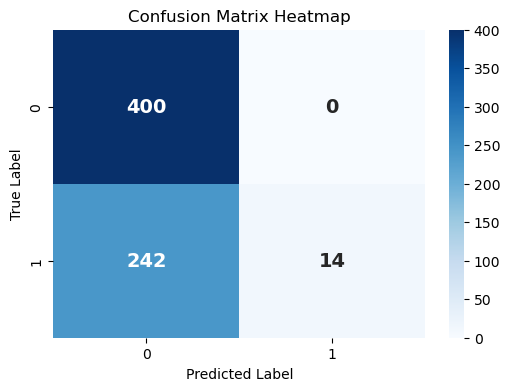

In [110]:
# Confusion matrix
conf_matrix = confusion_matrix(clf_y_test, y_pred)

# heatmap 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Anomali Detection Model

In [153]:
# Model Isolation Forest
model_anom = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42,
    n_jobs=-1,
)

In [154]:
model_anom.fit(anom_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,-1
,random_state,42
,verbose,0
,warm_start,False


In [155]:
# Cek proporsi anomali pada data train
# Jika proporsi 3-8% --> sehat, jika 15% --> data terlalu noisy/contamination terlalu tinggi
anom_train_preds = model_anom.predict(anom_train)
anom_train_anomalies = np.sum(anom_train_preds == -1)
anom_train_total = len(anom_train_preds)
anom_train_anomaly_ratio = anom_train_anomalies / anom_train_total
print(f"Anomaly Ratio in Training Data: {anom_train_anomaly_ratio:.2%}")

Anomaly Ratio in Training Data: 5.01%


In [156]:
# Distribusi skor
anom_scores_train = model_anom.decision_function(anom_train)

anom_scores_train.min(), anom_scores_train.mean(), anom_scores_train.max()

(-0.0996833241410533, 0.07581378137728383, 0.14400737124829083)

In [157]:
# Prediksi anomali
anom_flag_test = model_anom.predict(anom_test)

anom_score_test = model_anom.decision_function(anom_test)

# Inference

In [158]:
# Integrasi dengan classifier
y_prob_final = best_model.predict_proba(clf_X_test)[:,1]
y_pred_final = (y_prob_final >= 0.69).astype(int) # Threshold klasifikasi

idx_risk = (y_pred_final == 0)

anom_flag_risk = anom_flag_test[idx_risk]
anom_score_risk = anom_score_test[idx_risk]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 400 but corresponding boolean dimension is 656

In [ ]:
# Prediksi classifier
y_prob = best_model.predict_proba(clf_X_test)[:, 1]
y_pred = (y_prob >= 0.69).astype(int)

# Prediksi anomaly (SEMUA DATA)
anom_flag = anom_flag_test  # -1 anomali, 1 normal

# Integrasi risk assessment
risk_label = np.empty(len(y_pred), dtype=object)

# Potable + Normal
risk_label[(y_pred == 1) & (anom_flag == 1)]  = "AMAN"

# Potable + Anomali
risk_label[(y_pred == 1) & (anom_flag == -1)] = "PERLU DICEK"

# Non-Potable + Normal
risk_label[(y_pred == 0) & (anom_flag == 1)]  = "TIDAK_LAYAK"

# Non-Potable + Anomali
risk_label[(y_pred == 0) & (anom_flag == -1)] = "KRITIS"

In [ ]:
# Output Rekomendasi Final berdasarkan risk_label
if risk_label == "AMAN":
    print("Air layak konsumsi. Tidak ada tindakan khusus yang diperlukan.")
elif risk_label == "PERLU DICEK":
    print("Air layak konsumsi, namun disarankan untuk melakukan pengecekan lebih lanjut.")
elif risk_label == "TIDAK_LAYAK":
    print("Air tidak layak konsumsi. Hindari penggunaan untuk keperluan minum atau memasak.")
elif risk_label == "KRITIS":
    print("Air sangat tidak layak konsumsi. Segera hentikan penggunaan dan lakukan tindakan perbaikan.")

In [ ]:
# Export
output_df = clf_test.copy()
output_df['Predicted_Potability'] = y_pred
output_df['Anomaly_Flag'] = anom_flag
output_df['Risk_Label'] = risk_label
output_df['Recommended_Action'] = output_df['Risk_Label'].map({
    "AMAN": "Air layak konsumsi. Tidak ada tindakan khusus yang diperlukan.",
    "PERLU DICEK": "Air layak konsumsi, namun disarankan untuk melakukan pengecekan lebih lanjut.",
    "TIDAK_LAYAK": "Air tidak layak konsumsi. Hindari penggunaan untuk keperluan minum atau memasak.",
    "KRITIS": "Air sangat tidak layak konsumsi. Segera hentikan penggunaan dan lakukan tindakan perbaikan."
})
output_df.to_csv('../output/water_quality_assessment_results.csv', index=False)
